<a href="https://colab.research.google.com/github/anuvartika/jobportal-project/blob/master/AdvancedMachineLearningCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score

In [ ]:
# reading data

df = pd.read_csv("/content/WineQualityData.csv")

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (1143, 13)


In [ ]:
# See the first five rows of the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [ ]:
fig = px.histogram(df,x='quality')
fig.show()

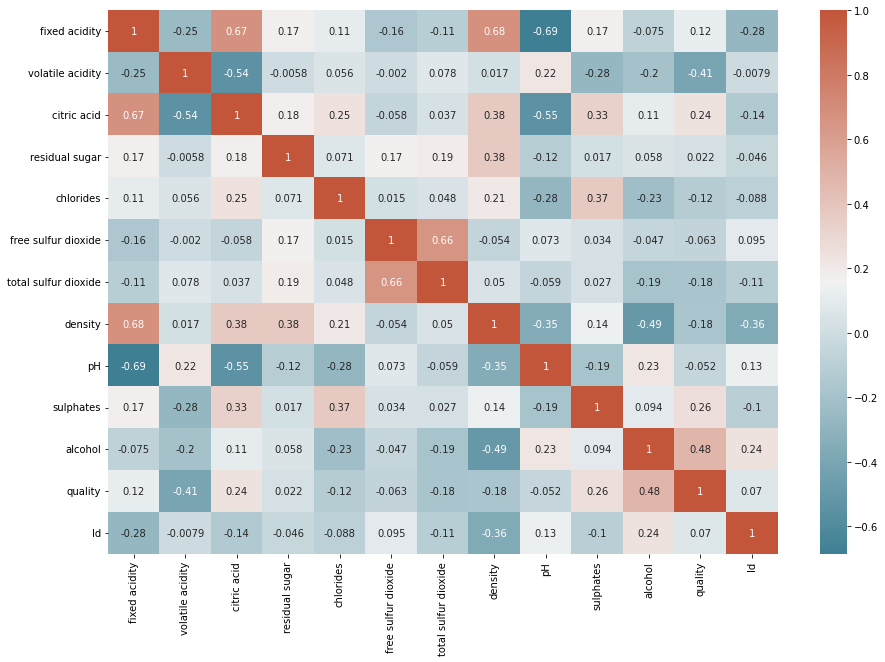

In [ ]:
corr = df.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [ ]:
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [ ]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    984
1    159
Name: goodquality, dtype: int64

In [ ]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
models = [ 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNaiveBayes',]
accuracy_score_list = []

In [ ]:
#DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       250
           1       0.54      0.58      0.56        36

    accuracy                           0.88       286
   macro avg       0.74      0.76      0.75       286
weighted avg       0.89      0.88      0.89       286



[Text(0.5238185975609756, 0.9615384615384616, 'X[10] <= 1.024\ngini = 0.246\nsamples = 857\nvalue = [734, 123]'),
 Text(0.22217987804878048, 0.8846153846153846, 'X[9] <= -0.075\ngini = 0.15\nsamples = 708\nvalue = [650, 58]'),
 Text(0.07240853658536585, 0.8076923076923077, 'X[7] <= -1.318\ngini = 0.036\nsamples = 442\nvalue = [434, 8]'),
 Text(0.024390243902439025, 0.7307692307692307, 'X[0] <= -0.865\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.012195121951219513, 0.6538461538461539, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.036585365853658534, 0.6538461538461539, 'X[10] <= 0.839\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.024390243902439025, 0.5769230769230769, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.04878048780487805, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12042682926829268, 0.7307692307692307, 'X[3] <= -0.946\ngini = 0.023\nsamples = 432\nvalue = [427, 5]'),
 Text(0.08536585365853659, 0.6538461538461539, 'X[9]

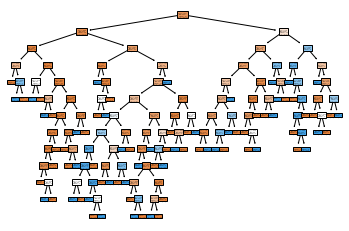

In [ ]:
from sklearn import tree
tree.plot_tree(model1,filled=True)

In [ ]:
as1 = accuracy_score(y_test, model1.predict(X_test))
accuracy_score_list.append(as1)
print(as1)

0.8846153846153846


In [ ]:
x_predict = list(model1.predict(X_test))
predicted_df = {'predicted_values': y_pred1, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
946,0,0
142,0,0
934,1,0
625,0,0
124,0,0
1039,0,0
14,0,0
609,0,0
1014,0,0
240,0,1


In [ ]:
#RandomForestClassfier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       250
           1       0.68      0.53      0.59        36

    accuracy                           0.91       286
   macro avg       0.81      0.75      0.77       286
weighted avg       0.90      0.91      0.90       286



[Text(0.5688291139240507, 0.9615384615384616, 'X[1] <= -0.592\ngini = 0.272\nsamples = 546\nvalue = [718, 139]'),
 Text(0.30537974683544306, 0.8846153846153846, 'X[9] <= 0.16\ngini = 0.474\nsamples = 172\nvalue = [164, 103]'),
 Text(0.1550632911392405, 0.8076923076923077, 'X[10] <= 1.024\ngini = 0.289\nsamples = 85\nvalue = [108, 23]'),
 Text(0.06962025316455696, 0.7307692307692307, 'X[9] <= -0.075\ngini = 0.112\nsamples = 55\nvalue = [79, 5]'),
 Text(0.02531645569620253, 0.6538461538461539, 'X[10] <= 0.654\ngini = 0.033\nsamples = 41\nvalue = [58, 1]'),
 Text(0.012658227848101266, 0.5769230769230769, 'gini = 0.0\nsamples = 35\nvalue = [52, 0]'),
 Text(0.0379746835443038, 0.5769230769230769, 'X[9] <= -0.662\ngini = 0.245\nsamples = 6\nvalue = [6, 1]'),
 Text(0.02531645569620253, 0.5, 'X[11] <= 0.196\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.012658227848101266, 0.4230769230769231, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0379746835443038, 0.4230769230769231, 'gini =

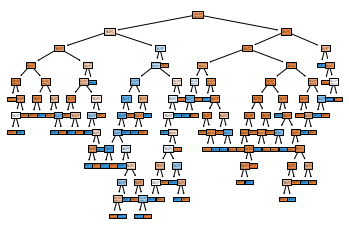

In [ ]:
from sklearn import tree
tree.plot_tree(model2.estimators_[0],filled=True)

In [ ]:
as2 = accuracy_score(y_test, model2.predict(X_test))
accuracy_score_list.append(as2)
print(as2)

0.9090909090909091


In [ ]:
x_predict = list(model2.predict(X_test))
predicted_df = {'predicted_values': y_pred2, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
946,0,0
142,0,0
934,0,0
625,0,0
124,0,0
1039,0,0
14,0,0
609,0,0
1014,0,0
240,0,1


In [ ]:
#KNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=22)
model3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       250
           1       0.53      0.25      0.34        36

    accuracy                           0.88       286
   macro avg       0.71      0.61      0.64       286
weighted avg       0.85      0.88      0.86       286



In [ ]:
as3 = accuracy_score(y_test, model3.predict(X_test))
accuracy_score_list.append(as3)
print(as3)

0.8776223776223776


In [ ]:
x_predict = list(model3.predict(X_test))
predicted_df = {'predicted_values': y_pred3, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
946,0,0
142,0,0
934,0,0
625,0,0
124,0,0
1039,0,0
14,0,0
609,0,0
1014,0,0
240,0,1


In [ ]:
#GaussianNaiveBayes
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       250
           1       0.41      0.67      0.51        36

    accuracy                           0.84       286
   macro avg       0.68      0.77      0.71       286
weighted avg       0.88      0.84      0.85       286



In [ ]:
as4 = accuracy_score(y_test, model4.predict(X_test))
accuracy_score_list.append(as4)
print(as4)

0.8391608391608392


In [ ]:
x_predict = list(model4.predict(X_test))
predicted_df = {'predicted_values': y_pred4, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
946,0,0
142,0,0
934,0,0
625,0,0
124,0,0
1039,0,0
14,0,0
609,0,0
1014,0,0
240,1,1


In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'accuracy_score' : accuracy_score_list})
compare.sort_values(by='accuracy_score' ,ascending=False)

,Algorithms,accuracy_score
1,RandomForestClassifier,0.909091
0,DecisionTreeClassifier,0.884615
2,KNeighborsClassifier,0.877622
3,GaussianNaiveBayes,0.839161


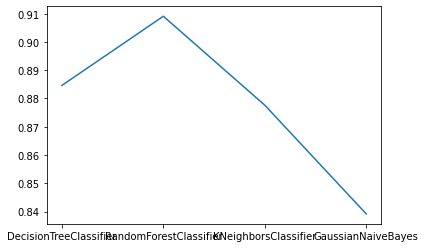

In [ ]:
plt.plot(compare['Algorithms'], compare['accuracy_score'], label = "accuracy_score")

In [ ]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,goodquality
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,8.846541,0.395314,0.391195,2.748428,0.074711,14.188679,36.672956,0.996019,3.282453,0.745849,11.528407,7.100629,827.081761,1.0
std,2.097038,0.134869,0.195116,1.400818,0.029154,9.903279,35.612808,0.002283,0.156297,0.141459,1.007960,0.301787,407.161943,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,8.000000,0.990640,2.880000,0.390000,9.200000,7.000000,7.000000,1.0
25%,7.400000,0.300000,0.320000,1.900000,0.062000,6.000000,18.000000,0.994610,3.200000,0.660000,10.800000,7.000000,443.000000,1.0
50%,8.700000,0.360000,0.410000,2.300000,0.073000,12.000000,28.000000,0.995680,3.270000,0.740000,11.600000,7.000000,941.000000,1.0
75%,10.100000,0.480000,0.520000,2.800000,0.083500,17.500000,43.000000,0.997350,3.375000,0.835000,12.250000,7.000000,1100.000000,1.0
max,15.600000,0.850000,0.760000,8.300000,0.358000,53.000000,289.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1584.000000,1.0


In [ ]:
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,goodquality
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.0
mean,8.224593,0.553318,0.248516,2.497205,0.088908,15.846037,47.408028,0.996845,3.315630,0.643465,10.266582,5.423780,801.396341,0.0
std,1.669548,0.176316,0.189707,1.345994,0.049304,10.291822,32.071725,0.001836,0.156313,0.170459,0.987707,0.590087,472.629595,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.0
25%,7.100000,0.430000,0.080000,1.900000,0.071000,7.000000,22.000000,0.995727,3.210000,0.540000,9.500000,5.000000,399.750000,0.0
50%,7.800000,0.550000,0.240000,2.200000,0.080000,14.000000,39.000000,0.996765,3.315000,0.600000,10.000000,5.000000,770.500000,0.0
75%,9.000000,0.660000,0.400000,2.600000,0.091000,21.000000,64.000000,0.997900,3.410000,0.692500,10.900000,6.000000,1238.250000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,165.000000,1.003690,4.010000,2.000000,14.900000,6.000000,1597.000000,0.0
